In [25]:
pip install ipynbname


Note: you may need to restart the kernel to use updated packages.


In [26]:
import os
import ipynbname

nb_path = ipynbname.path()
print("Notebook Full Path:", nb_path)
print("Notebook Folder:", nb_path.parent)


Notebook Full Path: C:\Users\shrey\OneDrive\Documents\emp-access-prediction\Preprocessing_AccessPrediction.ipynb.ipynb
Notebook Folder: C:\Users\shrey\OneDrive\Documents\emp-access-prediction


In [27]:
import ipynbname
nb_path = ipynbname.path()
print("Notebook Full Path:", nb_path)
print("Notebook Folder:", nb_path.parent)

Notebook Full Path: C:\Users\shrey\OneDrive\Documents\emp-access-prediction\Preprocessing_AccessPrediction.ipynb.ipynb
Notebook Folder: C:\Users\shrey\OneDrive\Documents\emp-access-prediction


In [28]:
import pandas as pd

df = pd.read_csv("data/train.csv")
df.head()


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [29]:
cat_features = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical Features:", cat_features)


Categorical Features: []


In [30]:
print(df.columns.tolist())


['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


In [31]:
cat_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'ACTION']


In [32]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()
le = LabelEncoder()

for col in cat_features:
    df_le[col] = le.fit_transform(df_le[col])


In [33]:
df_le.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [34]:
df_ohprep = df.copy()

# Convert known categorical columns to object type
for col in cat_features:
    df_ohprep[col] = df_ohprep[col].astype('object')

# Now apply one-hot encoding
df_oh = pd.get_dummies(df_ohprep, columns=cat_features, drop_first=True)

# Check the shape
print("Original shape:", df.shape)
print("One-hot encoded shape:", df_oh.shape)


Original shape: (32769, 10)
One-hot encoded shape: (32769, 10)


In [35]:
df_oh = pd.get_dummies(df, columns=cat_features, drop_first=True)
df_oh.head()


,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [36]:
df_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [37]:
print("Original shape:", df.shape)
print("One-hot encoded shape:", df_oh.shape)


Original shape: (32769, 10)
One-hot encoded shape: (32769, 10)


In [39]:
print(cat_features)


[]


In [40]:
cat_features = [
    'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
    'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC',
    'ROLE_FAMILY', 'ROLE_CODE'
]


In [41]:
for col in cat_features:
    print(f"{col}: {df[col].nunique()} unique values")


RESOURCE: 7518 unique values
MGR_ID: 4243 unique values
ROLE_ROLLUP_1: 128 unique values
ROLE_ROLLUP_2: 177 unique values
ROLE_DEPTNAME: 449 unique values
ROLE_TITLE: 343 unique values
ROLE_FAMILY_DESC: 2358 unique values
ROLE_FAMILY: 67 unique values
ROLE_CODE: 343 unique values


In [42]:
#splitting the cols to target encoding and label encoding depending upon the number of unique values they contain
target_enc_cols = [
    'RESOURCE', 'MGR_ID', 'ROLE_DEPTNAME',
    'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_CODE'
]

label_enc_cols = [
    'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_FAMILY'
]


In [43]:
!pip install category_encoders

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 6.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 5.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 4.9 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 4.5 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.8 MB 4.7 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.8 MB 4.5 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 4.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 3.8 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 3.6 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 3.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 3.4 MB/s eta 0:00:01
   ----------------

In [45]:
import category_encoders as ce

df_te = df.copy()

# Apply label encoding to low-cardinality cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in label_enc_cols:
    df_te[col] = le.fit_transform(df_te[col])

# Apply target encoding to high-cardinality cols
te = ce.TargetEncoder(cols=target_enc_cols)
df_te[target_enc_cols] = te.fit_transform(df_te[target_enc_cols], df_te['ACTION'])

df_te.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,0.951052,0.998303,21,64,0.958244,0.967625,0.933440,64,0.967625
1,1,0.960062,0.957679,21,68,0.893082,0.962916,0.960057,66,0.962916
2,1,0.950322,0.951052,50,57,0.923077,0.889331,0.939976,3,0.889331
3,1,0.949642,0.999145,21,68,0.989474,0.920413,0.955788,64,0.920413
4,1,0.955510,0.956567,15,13,0.769707,0.866974,0.944608,4,0.866974


In [46]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Drop target column and scale the features
X = df_te.drop(columns=['ACTION'])
y = df_te['ACTION']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
print(df_te.shape)
print(df.head())


(32769, 10)
   ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
0      117905            117906       290919     117908  
1      118536            118536       308574     118539  
2      117879            267952        19721     117880  
3      118321            240983       290919     118322  
4      119323            123932        19793     119325  


In [50]:
df_encoded = df_te.copy()  # This creates the variable we expected


In [53]:
#train test split
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['ACTION'])
y = df_encoded['ACTION']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [57]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
lr = LogisticRegression(max_iter=1000,)

lr.fit(X_train, y_train)

# Predict on validation set
y_pred = lr.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9491913335367714

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.29      0.40       379
           1       0.96      0.99      0.97      6175

    accuracy                           0.95      6554
   macro avg       0.80      0.64      0.68      6554
weighted avg       0.94      0.95      0.94      6554



In [58]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on validation set
y_pred_dt = dt.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))


Accuracy: 0.9606347268843455

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66       379
           1       0.98      0.98      0.98      6175

    accuracy                           0.96      6554
   macro avg       0.82      0.82      0.82      6554
weighted avg       0.96      0.96      0.96      6554



In [59]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [61]:
#XGBOOST

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_xgb))


C:\Users\shrey\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:32:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9711626487641135

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       379
           1       0.98      0.99      0.98      6175

    accuracy                           0.97      6554
   macro avg       0.88      0.84      0.86      6554
weighted avg       0.97      0.97      0.97      6554



In [62]:
pip install shap


   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   -------------------------------------- - 524.3/545.1 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 545.1/545.1 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------- ----------------- 1.6/2.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 115.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.9/12.6 MB 9.0 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.6 MB 8.9 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.6 MB 8.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.6 MB 6.2 MB/s eta 0:00:01
   -------------------------- ------------- 8.4/12.6 MB 6.4 MB/s eta 0:00:01
   -----------

  You can safely remove it manually.
  You can safely remove it manually.


In [64]:
import pandas as pd

results = {
    'Model': [
        'Logistic Regression (no weights)',
        'Logistic Regression (balanced)',
        'Decision Tree',
        'XGBoost'
    ],
    'Class 0 Recall': [0.29, 0.89, 0.66, 0.70],
    'Class 0 Precision': [0.63, 0.38, 0.66, 0.78],
    'Accuracy': [0.949, 0.908, 0.960, 0.971]
}

df_results = pd.DataFrame(results)
print(df_results)


                              Model  Class 0 Recall  Class 0 Precision  \
0  Logistic Regression (no weights)            0.29               0.63   
1    Logistic Regression (balanced)            0.89               0.38   
2                     Decision Tree            0.66               0.66   
3                           XGBoost            0.70               0.78   

   Accuracy  
0     0.949  
1     0.908  
2     0.960  
3     0.971  


In [65]:
# For XGBoost
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = xgb.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nTrain Report:\n", classification_report(y_train, y_train_pred))


Train Accuracy: 0.9903871829105474

Train Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1518
           1       0.99      1.00      0.99     24697

    accuracy                           0.99     26215
   macro avg       0.97      0.94      0.95     26215
weighted avg       0.99      0.99      0.99     26215



In [67]:
#HyperParameter tuning
#LOG REGRESSION
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # l1 requires solver='liblinear'
    'solver': ['lbfgs'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7443376010456157


In [68]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [72]:
#XGBoost(using RandomizedSearchCV)

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5]  # imbalance handling
}

# Randomized search with the estimator included ✅
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(eval_metric='logloss'),  # ✅ THIS WAS MISSING
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='f1_macro',
    random_state=42,
    verbose=1,  # Optional: shows progress in console
    n_jobs=-1   # Optional: use all CPU cores for speed
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best found parameters
print("Best Params:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [73]:
import pickle

# Save the best estimator to a file
with open("xgboost_best_model.pkl", "wb") as f:
    pickle.dump(random_search.best_estimator_, f)

print("✅ Model saved as xgboost_best_model.pkl")


✅ Model saved as xgboost_best_model.pkl


In [76]:
import pickle

with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(dt, f)

print("✅ Model saved as decision_tree_model.pkl")


✅ Model saved as decision_tree_model.pkl


In [77]:
import pickle

with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(lr, f)
    
print("✅ Model saved as log_regression_model.pkl")

✅ Model saved as log_regression_model.pkl


C:\Users\shrey\AppData\Local\Temp\ipykernel_2228\1587534324.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shrey\AppData\Local\Temp\ipykernel_2228\1587534324.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/decision_tree_feature_importance.png")
C:\Users\shrey\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


✅ Decision Tree feature importance plot saved.


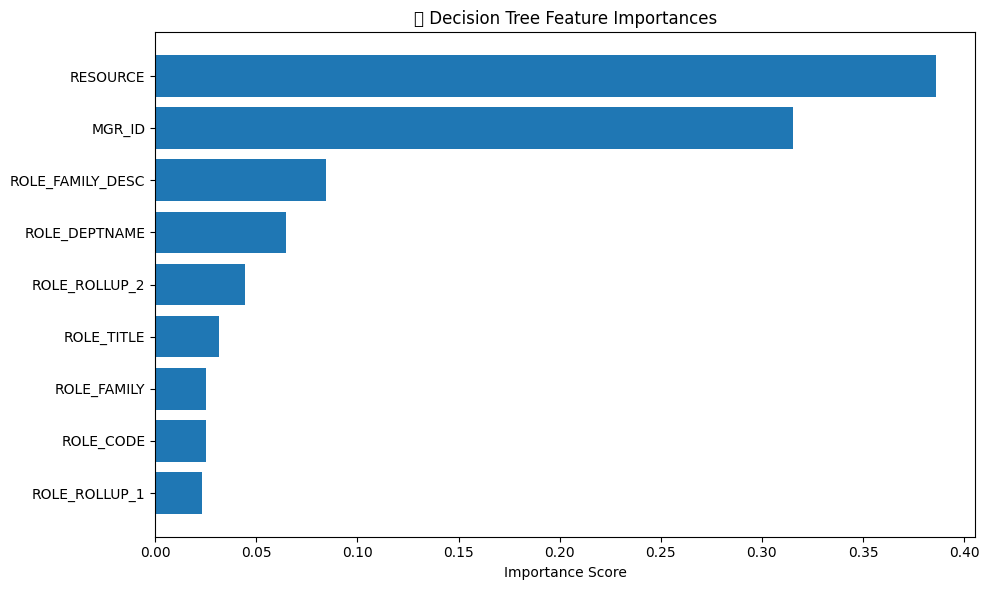

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = dt.feature_importances_

# Create DataFrame
feature_names = X_train.columns  # or provide your list of column names
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("📊 Decision Tree Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("outputs/decision_tree_feature_importance.png")
print("✅ Decision Tree feature importance plot saved.")


In [83]:
xgb_model = random_search.best_estimator_


✅ XGBoost feature importance plot saved.


C:\Users\shrey\AppData\Local\Temp\ipykernel_2228\2744452026.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shrey\AppData\Local\Temp\ipykernel_2228\2744452026.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/xgboost_feature_importance.png")


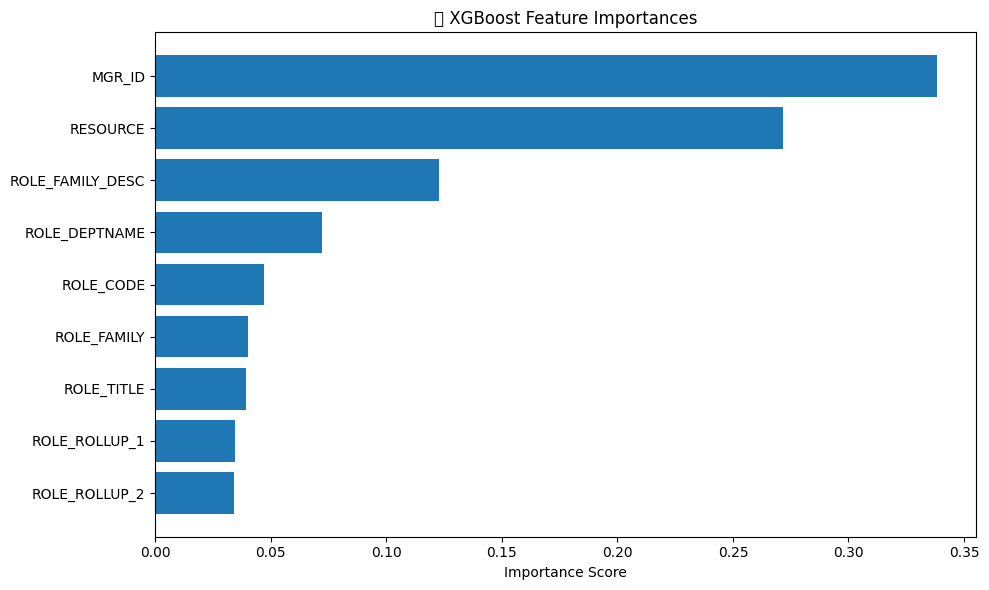

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Fix: Assign best model from RandomizedSearchCV
xgb_model = random_search.best_estimator_

# Extract feature importances
xgb_importances = xgb_model.feature_importances_
feature_names = X_train.columns  # make sure X_train is a DataFrame

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("📊 XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("outputs/xgboost_feature_importance.png")
print("✅ XGBoost feature importance plot saved.")
